In [1]:
import numpy as np

import nusynth.ansatz as a
import nusynth.squander as s
import nusynth.utils as u

In [2]:
sa = a.SquanderAnsatz(3, tolerance=1e-6, initial_guess='random')

In [3]:
def gen_permutation(n_qubits):
    dim = 2 ** n_qubits
    perm = np.random.permutation(dim)
    out = np.zeros((dim, dim))
    out[np.arange(dim), perm] = 1

    return out

In [8]:
p = gen_permutation(3)

In [12]:
import nusynth.squander as s
import nusynth.utils as u

In [ ]:
cqt = s.decompose(p, initial_guess='random', tolerance=1e-12, optimize_layer_num=True)

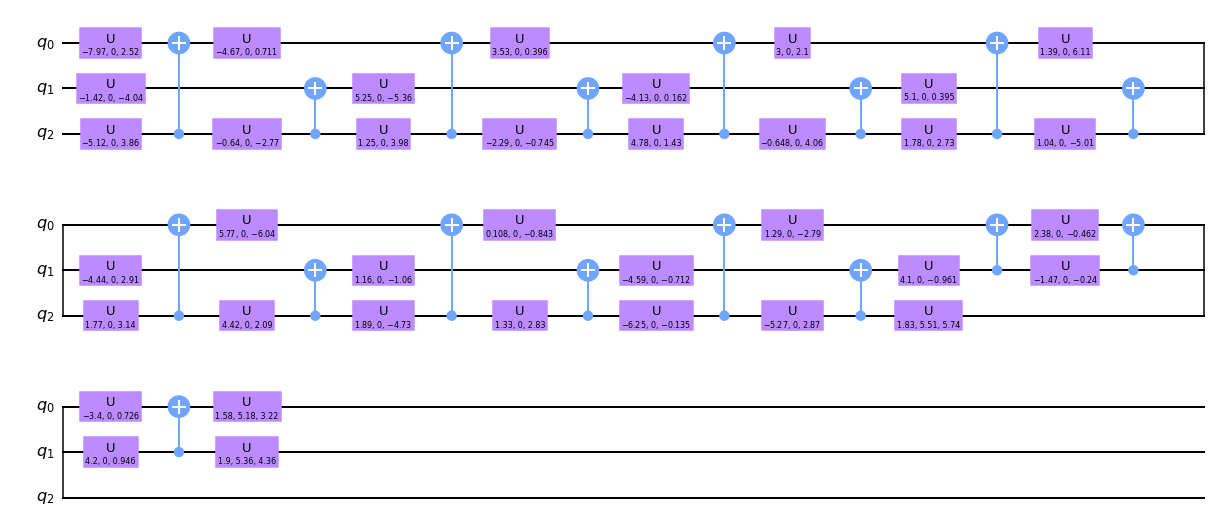

In [ ]:
cqt.draw('mpl')

In [71]:
u.fidelity(u.circuit_to_unitary(cqt), p)

0.9999999999998621

In [35]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m.conj().T @ m)

In [45]:
sa(u.unitary_to_vec(p))

array([-1.39573783, -2.51327395,  6.87826068, -4.62293706,  1.68735784,
       -4.68619528,  4.23362353,  5.30941296,  4.5920321 ,  5.71504251,
        2.68227167,  0.10675821,  0.90854682, -1.75424903,  4.82064835,
        2.34916821, -0.42639476, -4.17166032, -0.9722562 ,  5.7457284 ,
        4.43299363, -3.88460976, -1.36411753, -0.08022707,  3.21790848,
       -3.04870473,  2.4716763 , -2.12325153, -4.82288505,  3.41424343,
        0.9074729 ,  5.01426559, -0.29316309, -3.787067  , -4.10475045,
        4.42823974, -5.39397558,  4.00290922, -2.22994155, -0.09616246,
        3.49588458, -0.16438048,  0.48797088, -4.90489013, -3.9765195 ,
       -1.7502961 ,  2.57530677,  6.04757233, -4.35766933, -1.60079937,
        3.24342561,  0.68012859,  3.44743682,  0.01975698,  1.12606991,
       -5.11320201, -5.05984881, -0.77609663, -1.72079144,  2.54261037,
        1.48874393,  0.45093082,  0.01708794,  3.5140612 , -0.2255034 ,
       -2.53203905, -5.11465183, -3.35573356,  1.26218962,  0.04

In [36]:
is_unitary(gen_permutation(3))

True

In [29]:
p = gen_permutation(3)

In [30]:
p @ p.conj().T

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
gen_permutation(3)

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.]])

In [29]:
sa(u.unitary_to_vec(u.random_unitary(3)))

array([-2.63015675,  2.42007869, -1.75807752,  1.73024145, -6.69148304,
        0.64149191,  3.98378523, -3.29756238, -5.89652613,  1.21544505,
        5.21998831,  2.13606052, -0.40773724,  4.56227065,  6.2387711 ,
       -6.09856712, -3.44374779,  4.37542194, -4.17432199,  3.00406487,
       -7.33475945, -1.34297163, -4.88688519,  3.57487934,  4.22280593,
       -1.33007916,  5.15353788,  4.72471751,  0.32922609, -2.0319419 ,
       -4.39222784,  4.46856008,  1.87284579,  0.88935072,  4.78871962,
       -4.32609783, -2.05998242, -0.68228488,  1.72628496, -5.31178066,
       -3.74210501, -4.34839198,  5.14369438,  4.85199305,  3.97883146,
        2.51659787,  1.80086127, -3.77034828,  2.49413927,  4.68587416,
       -3.06512514, -1.77976639, -6.08329695,  1.97581884,  0.7057633 ,
       -3.97591874,  2.86551823,  2.40911172,  2.88626334,  2.53528683,
        2.94215989,  2.13027912,  1.95417232,  0.05806169,  2.47869696,
        2.80912077,  4.69124394,  2.61146637,  2.17961393,  2.37

In [30]:
from qiskit import QuantumCircuit

In [46]:
from qiskit.circuit.library import EfficientSU2

In [39]:
 = EfficientSU2(3, entanglement='circular', reps=3)

SyntaxError: invalid syntax (3683194903.py, line 1)

In [33]:
def u3gate_3q(input):
    qc = QuantumCircuit(3)
    qc.u(*input[0:3], 0)
    qc.u(*input[3:6], 1)
    qc.u(*input[6:9], 2)
    
    return qc

In [60]:
def su2_3q(input, reps):
    ansatz = EfficientSU2(
        3, reps=reps,
        su2_gates=['ry', 'rz']
    ).decompose().bind_parameters(input)
    qc = QuantumCircuit(3)
    qc.compose(ansatz, inplace=True)
    
    return qc

In [61]:
qc = su2_3q(list(range(36)), 5)

In [62]:
qc.draw()

┌───────┐┌───────┐          ┌───────┐┌───────┐                    »
q_0: ┤ Ry(0) ├┤ Rz(3) ├──■────■──┤ Ry(6) ├┤ Rz(9) ├────────────■────■──»
     ├───────┤├───────┤┌─┴─┐  │  └───────┘├───────┤┌────────┐┌─┴─┐  │  »
q_1: ┤ Ry(1) ├┤ Rz(4) ├┤ X ├──┼──────■────┤ Ry(7) ├┤ Rz(10) ├┤ X ├──┼──»
     ├───────┤├───────┤└───┘┌─┴─┐  ┌─┴─┐  ├───────┤├────────┤└───┘┌─┴─┐»
q_2: ┤ Ry(2) ├┤ Rz(5) ├─────┤ X ├──┤ X ├──┤ Ry(8) ├┤ Rz(11) ├─────┤ X ├»
     └───────┘└───────┘     └───┘  └───┘  └───────┘└────────┘     └───┘»
«     ┌────────┐┌────────┐                    ┌────────┐┌────────┐          »
«q_0: ┤ Ry(12) ├┤ Rz(15) ├────────────■────■──┤ Ry(18) ├┤ Rz(21) ├──────────»
«     └────────┘├────────┤┌────────┐┌─┴─┐  │  └────────┘├────────┤┌────────┐»
«q_1: ────■─────┤ Ry(13) ├┤ Rz(16) ├┤ X ├──┼──────■─────┤ Ry(19) ├┤ Rz(22) ├»
«       ┌─┴─┐   ├────────┤├────────┤└───┘┌─┴─┐  ┌─┴─┐   ├────────┤├────────┤»
«q_2: ──┤ X ├───┤ Ry(14) ├┤ Rz(17) ├─────┤ X ├──┤ X ├───┤ Ry(20) ├┤ Rz(23) ├»
«       └───┘   └────────┘└────────┘     └───┘  └───┘   └────────┘└────────┘»
«               ┌────────┐┌────────┐                    ┌────────┐┌────────┐»
«q_0: ──■────■──┤ Ry(24) ├┤ Rz(27) ├────────────■────■──┤ Ry(30) ├┤ Rz(33) ├»
«     ┌─┴─┐  │  └────────┘├────────┤┌────────┐┌─┴─┐  │  └────────┘├────────┤»
«q_1: ┤ X ├──┼──────■─────┤ Ry(25) ├┤ Rz(28) ├┤ X ├──┼──────■─────┤ Ry(31) ├»
«     └───┘┌─┴─┐  ┌─┴─┐   ├────────┤├────────┤└───┘┌─┴─┐  ┌─┴─┐   ├────────┤»
«q_2: ─────┤ X ├──┤ X ├───┤ Ry(26) ├┤ Rz(29) ├─────┤ X ├──┤ X ├───┤ Ry(32) ├»
«          └───┘  └───┘   └────────┘└────────┘     └───┘  └───┘   └────────┘»
«               
«q_0: ──────────
«     ┌────────┐
«q_1: ┤ Rz(34) ├
«     ├────────┤
«q_2: ┤ Rz(35) ├
«     └────────┘

In [57]:
from qiskit import transpile

In [59]:
transpile(qc, ).draw()

/home/allen/.conda/envs/nusynth/lib/python3.9/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                 ├
«     │                                                                                                                  │
«q_1: ┤1 EfficientSU2(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) ├
«     │                                                                                                                  │
«q_2: ┤2                                                                                                                 ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [55]:
qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                 ├
«     │                                                                                                                  │
«q_1: ┤1 EfficientSU2(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) ├
«     │                                                                                                                  │
«q_2: ┤2                                                                                                                 ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [52]:
u.circuit_to_unitary(qc)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-227 contains invalid instructions {"instructions": {save_unitary}, "gates": {EfficientSU2}} for "statevector" method.


QiskitError: 'Data for experiment "circuit-227" could not be found.'

In [51]:
print(qc)

     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                 ├
«     │                                                                                                                  │
«q_1: ┤1 EfficientSU2(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) ├
«     │                                                                                                                  │
«q_2: ┤2                                                                                                                 ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘


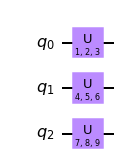

In [34]:
u3gate_3q([1, 2, 3, 4, 5, 6, 7, 8, 9]).draw('mpl')

In [ ]:
from abc import ABC, abstractmethod
import numpy as np
from qiskit import QuantumCircuit


class Ansatz(ABC):
    @property
    @abstractmethod
    def params_range(self) -> np.ndarray:
        ...
    
    
    @abstractmethod
    def template(self, input) -> QuantumCircuit:
        ...
    
    
    def n_params(self):
        return len(self.params_range)
    
    
    def generate_sweep()